In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import torch
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay   
import sdfpred_utils.sdfpred_utils as su
import sdfpred_utils.loss_functions as lf

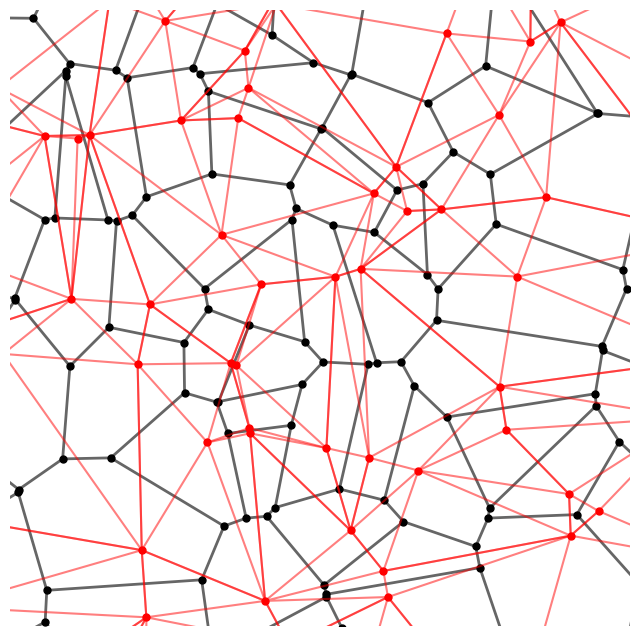

In [2]:
N = 100

# Improve reproducibility
torch.manual_seed(69)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(69)

# Generate N site positions
site_positions = np.random.rand(N, 2) * 100

def plot_voronoi_diagram(site_positions, output, aux_points=None):
    # Create a Voronoi diagram
    vor = Voronoi(site_positions)

    # Plot the Voronoi diagram
    fig, ax = plt.subplots(figsize=(8, 8))
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black', line_width=2, line_alpha=0.6, point_size=2)

    # Add site positions
    ax.plot(site_positions[:, 0], site_positions[:, 1], 'ro', markersize=5, label='Sites')

    # Add vertices (black)
    ax.plot(vor.vertices[:, 0], vor.vertices[:, 1], 'o', markersize=5, label='Vertices', color='black')

    # Make the connection between adjacent sites
    tri = Delaunay(site_positions)
    for simplex in tri.simplices:
        ax.plot(site_positions[simplex, 0], site_positions[simplex, 1], 'r-', alpha=0.5)

    # DEBUG: Show the Voronoi
    # cell_centers = np.array([vor.vertices[vor.regions[i]].mean(axis=0) for i in range(len(vor.regions)) if len(vor.regions[i]) > 0])
    # ax.plot(cell_centers[:, 0], cell_centers[:, 1], 'go', markersize=5, label='Cell Centers')
    if aux_points is not None:
        ax.scatter(aux_points[:, 0], aux_points[:, 1], c='blue', s=5, label='Aux Points')
        
    # Crop important area
    ax.set_xlim(20, 80)
    ax.set_ylim(20, 80)

    # Remove all axes
    ax.axis('off')

    # Save as svg
    plt.savefig(output, format='svg', bbox_inches='tight')
    plt.show()

plot_voronoi_diagram(site_positions, 'voronoi_diagram.svg')

CVT Loss: 11.576456069946289
torch.Size([290, 2])
CVT X: tensor([[ 3.2683e+01,  8.0907e+01],
        [ 2.9625e+01,  8.3540e+01],
        [ 2.3106e+01,  8.0907e+01],
        [ 3.9420e+01,  7.8941e+01],
        [ 3.5025e+01,  8.3792e+01],
        [ 3.1967e+01,  7.8941e+01],
        [ 6.3618e+01,  2.5359e+01],
        [ 5.6135e+01,  2.8606e+01],
        [ 5.2097e+01,  2.5359e+01],
        [ 1.4971e+01,  5.8461e+00],
        [ 1.0498e+01,  8.2441e+00],
        [ 8.1675e+00,  5.8461e+00],
        [ 7.6666e+01,  6.9783e+01],
        [ 6.7329e+01,  7.3996e+01],
        [ 6.1064e+01,  6.9783e+01],
        [ 8.7557e+01,  7.8787e+01],
        [ 7.3278e+01,  8.2534e+01],
        [ 7.1226e+01,  7.8787e+01],
        [ 1.8761e+01,  3.1768e+01],
        [ 7.6376e+00,  3.6671e+01],
        [ 5.6599e+00,  3.1768e+01],
        [ 7.6011e+01,  3.2849e+01],
        [ 7.4102e+01,  3.8911e+01],
        [ 6.7835e+01,  3.2849e+01],
        [ 5.1364e+01,  1.8109e+01],
        [ 4.7015e+01,  2.0902e+01],
       

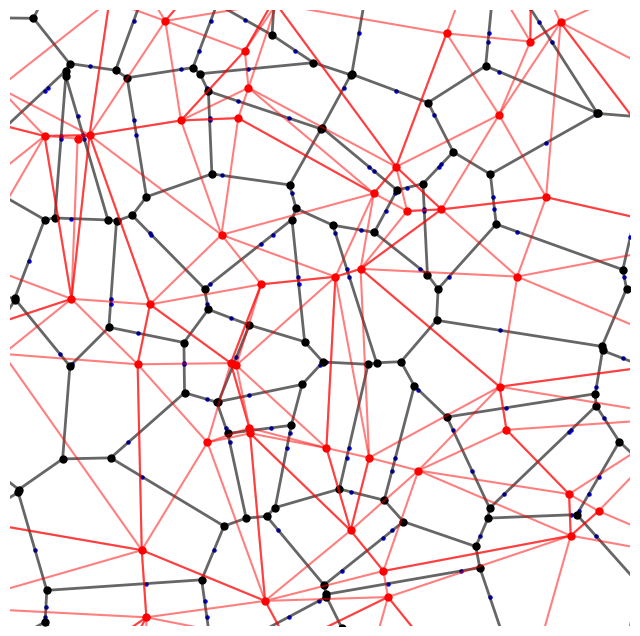

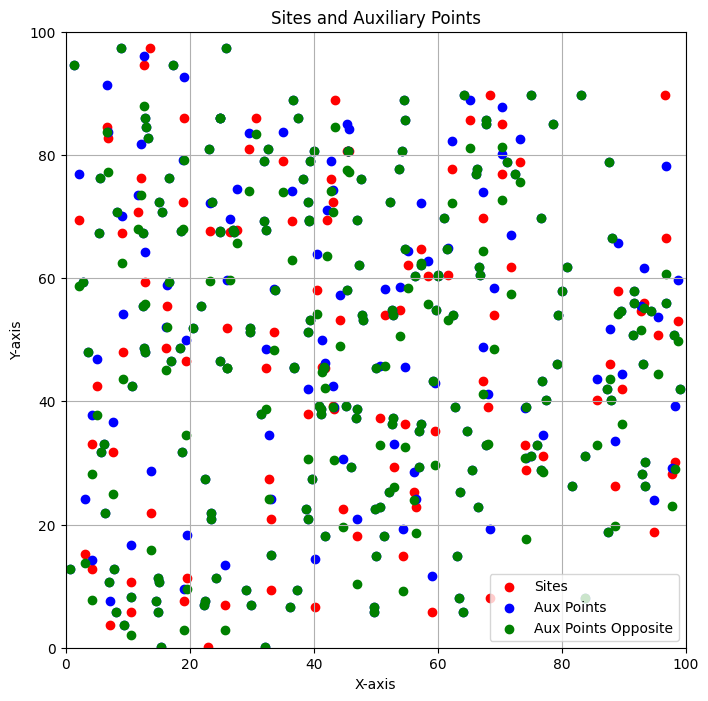

In [3]:
cvt_loss, x, xp = lf.compute_cvt_dist(torch.tensor(site_positions, dtype=torch.float32, device=0), M=3, N=40, random=False, max_distance=1000)
print(f'CVT Loss: {cvt_loss.item()}')
print(x.shape)
print(f'CVT X: {x}')
plot_voronoi_diagram(site_positions, 'voronoi_diagram_with_aux.svg', aux_points=x.detach().cpu().numpy())

# Plot all points in x
plt.figure(figsize=(8, 8))
plt.scatter(site_positions[:, 0], site_positions[:, 1], c='red', label='Sites')
plt.scatter(x[:, 0].detach().cpu().numpy(), x[:, 1].detach().cpu().numpy(), c='blue', label='Aux Points')
plt.scatter(xp[:, 0].detach().cpu().numpy(), xp[:, 1].detach().cpu().numpy(), c='green', label='Aux Points Opposite')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()
plt.title('Sites and Auxiliary Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.savefig('sites_and_aux_points.svg', format='svg', bbox_inches='tight')
plt.show()


Energy: 5.952625751495361
Energy: 4.473587989807129
Energy: 4.3918538093566895
Energy: 4.57210636138916
Energy: 5.446258544921875
Energy: 5.184319496154785
Energy: 4.720369338989258
Energy: 4.398088455200195
Energy: 4.843322277069092
Energy: 5.075146198272705
Energy: 4.614476680755615
Energy: 4.345930576324463
Energy: 4.896492004394531
Energy: 4.402130126953125
Energy: 4.290042400360107
Energy: 4.267247676849365
Energy: 4.548500061035156
Energy: 4.245874404907227
Energy: 4.5399885177612305
Energy: 4.345119476318359
Energy: 4.535950660705566
Energy: 4.3122687339782715
Energy: 4.663556098937988
Energy: 4.925317764282227
Energy: 4.244581699371338
Energy: 4.332781791687012
Energy: 5.560781955718994
Energy: 5.103847503662109
Energy: 4.249423503875732
Energy: 4.104938507080078
Energy: 4.102092266082764
Energy: 4.584666728973389
Energy: 4.118409156799316
Energy: 4.087350368499756
Energy: 4.245992660522461
Energy: 4.065006732940674
Energy: 4.118673324584961
Energy: 5.063044548034668
Energy: 4.

Energy: 3.93202805519104
Energy: 3.5729119777679443
Energy: 3.5973281860351562
Energy: 3.9120702743530273
Energy: 3.72631573677063
Energy: 4.42665433883667
Energy: 3.7482502460479736
Energy: 3.5657713413238525
Energy: 3.572247266769409
Energy: 3.9117448329925537
Energy: 4.27616548538208
Energy: 3.6357812881469727
Energy: 4.750288963317871
Energy: 4.575403213500977
Energy: 3.4853880405426025
Energy: 3.9809017181396484
Energy: 3.461859703063965
Energy: 4.565267086029053
Energy: 3.76269268989563
Energy: 3.788259744644165
Energy: 4.26012659072876
Energy: 4.329002857208252
Energy: 3.6991937160491943
Energy: 5.023977756500244
Energy: 3.4364724159240723
Energy: 3.41585111618042
Energy: 3.446195125579834
Energy: 3.4952571392059326
Energy: 3.4067256450653076
Energy: 4.3991875648498535
Energy: 3.7890617847442627
Energy: 3.770101547241211
Energy: 3.4679017066955566
Energy: 5.149801254272461
Energy: 3.3843071460723877
Energy: 3.767183542251587
Energy: 5.131161212921143
Energy: 4.656784534454346
En

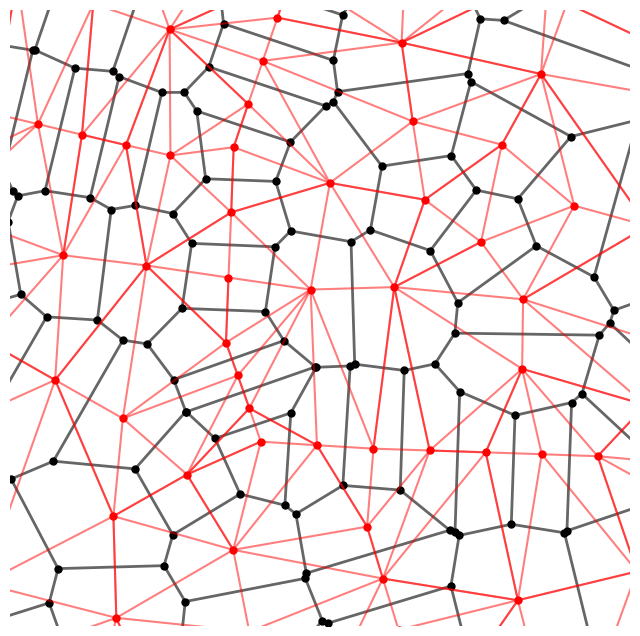

In [4]:
# Optimize the site position with pytorch to minimize the CVT energy
site_positions_tensor = torch.tensor(site_positions, dtype=torch.float32, requires_grad=True, device=0)
optimizer = torch.optim.Adam([site_positions_tensor], lr=0.01)

torch.autograd.set_detect_anomaly(True)

for _ in range(2000):
    optimizer.zero_grad()
    d3dsimplices = Delaunay(site_positions_tensor.detach().cpu().numpy()).simplices
    cvt_loss, _, _ = lf.compute_cvt_dist(site_positions_tensor, N=40, max_distance=100, M=3)
    energy = cvt_loss.mean()
    energy.backward()
    print(f'Energy: {energy.item()}')
    optimizer.step()

# Plot the optimized Voronoi diagram
optimized_site_positions = site_positions_tensor.detach().cpu().numpy()
plot_voronoi_diagram(optimized_site_positions, 'optimized_voronoi_diagram.svg')

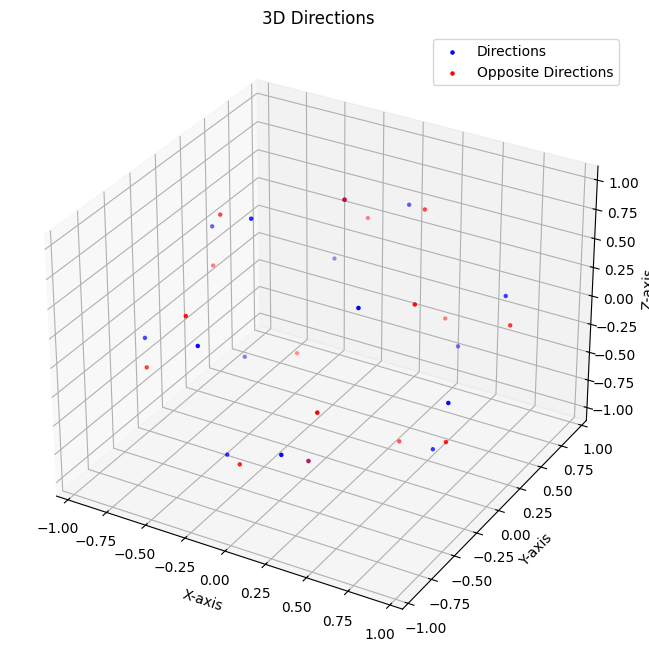

In [ ]:
M = 64  # Number of directions
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
random = True  # Whether to apply random rotation
import math

# Fibonnaci sphere sampling for 3D directions
phi = (1 + math.sqrt(5)) / 2  # Golden ratio
indices = torch.arange(M, device=device)
theta = 2 * math.pi * indices / phi  # Azimuthal angle
y = 1 - (indices / (M - 1)) * 2 # y goes from 1 to -1
radius = torch.sqrt(1 - y**2)  # Radius in the xy-plane
directions = torch.stack((radius * torch.cos(theta), radius * torch.sin(theta), y), dim=1)

# Randomly pertub the directions with random rotation XYX
if random:
    angles = torch.rand(3, device=device) * (math.pi / M)
    # Compute rotation matrix for random angles XYX
    rot_X = torch.tensor([[1, 0, 0],
                            [0, torch.cos(angles[0]), -torch.sin(angles[0])],
                            [0, torch.sin(angles[0]), torch.cos(angles[0])]], device=device)
    rot_Y = torch.tensor([[torch.cos(angles[1]), 0, torch.sin(angles[1])],
                            [0, 1, 0],
                            [-torch.sin(angles[1]), 0, torch.cos(angles[1])]], device=device)
    rot_X2 = torch.tensor([[1, 0, 0],
                            [0, torch.cos(angles[2]), -torch.sin(angles[2])],
                            [0, torch.sin(angles[2]), torch.cos(angles[2])]], device=device)
    rotation_matrix = torch.matmul(rot_X, torch.matmul(rot_Y, rot_X2))
    directions = torch.matmul(directions.unsqueeze(1), rotation_matrix).squeeze(1)
directions_opp = -directions.clone()  # (M, 3)

# Plot the 3D directions
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(directions[:, 0].cpu().numpy(), directions[:, 1].cpu().numpy(), directions[:, 2].cpu().numpy(), c='blue', s=5, label='Directions')
ax.scatter(directions_opp[:, 0].cpu().numpy(), directions_opp[:, 1].cpu().numpy(), directions_opp[:, 2].cpu().numpy(), c='red', s=5, label='Opposite Directions')
ax.set_title('3D Directions')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()
plt.savefig('3d_directions.svg', format='svg', bbox_inches='tight')
plt.show()